In [3]:
import os
from pdf2image import convert_from_path
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

def extract(X):
    model = tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(224,224, 3),
    pooling=None,
    )
    
    return model.predict(X)

def pdf2img(pdf):
    pages = convert_from_path(pdf)
    pages[0].save("temp.jpg", "JPEG")
    img = image.load_img("temp.jpg", target_size=(224, 224, 3))
    x = image.img_to_array(img)
    x = preprocess_input(x)
    return x
    
if __name__=='__main__':
    featurelist = []
    namelist = {}
    fpath = 'dataset/GoodData'
    for num, i in enumerate(os.listdir(fpath)):
        #print(num)
        path_ = os.path.join(fpath,i)
        
        if os.path.isfile(path_):
            #pdf to x
            namelist[num+1] = i
            feature = pdf2img(path_)
            featurelist.append(feature)
            
    featurelist = extract(np.array(featurelist))
    featurelist = featurelist.reshape([featurelist.shape[0],-1])
    #np.save('featurelist', featurelist)

    print("feature extraction done")
            

feature extraction done


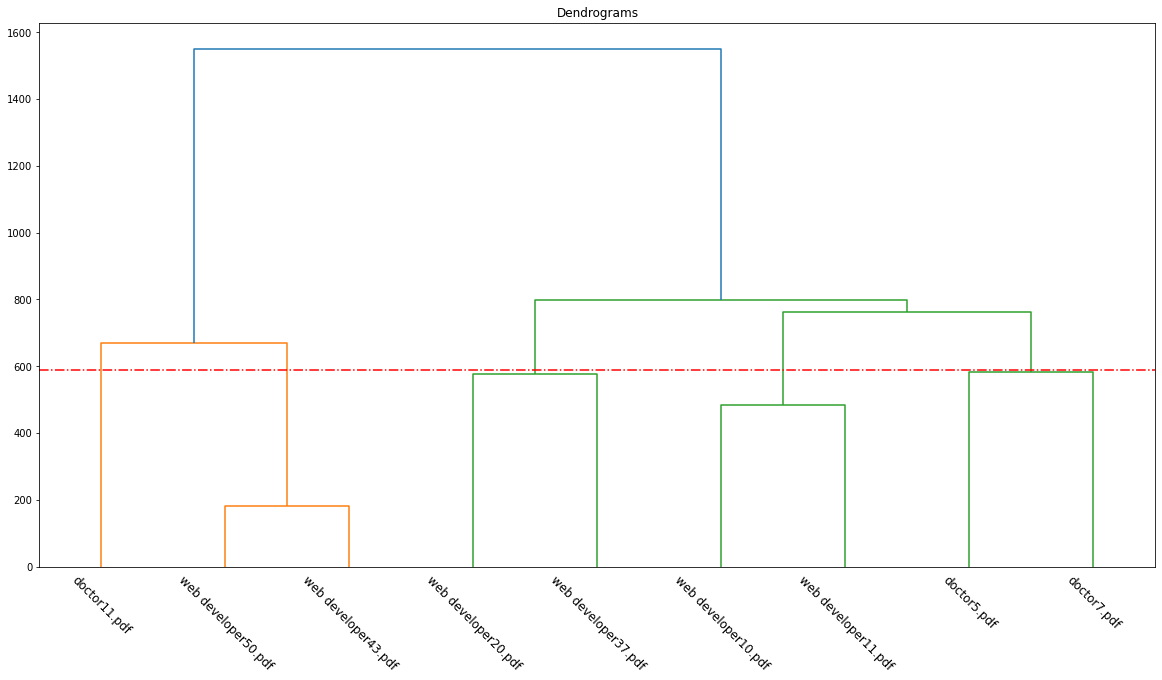

In [33]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")
plt.axhline(y=590, color='red', ls='-.')

link = shc.linkage(featurelist, method='ward')

dend = shc.dendrogram(link, labels=list(namelist.values()), leaf_rotation=-45)
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=650).fit(featurelist)
print(namelist)


{1: 'web developer10.pdf', 2: 'web developer11.pdf', 3: 'web developer50.pdf', 4: 'web developer43.pdf', 5: 'web developer20.pdf', 6: 'doctor5.pdf', 7: 'doctor7.pdf', 8: 'doctor11.pdf', 9: 'web developer37.pdf'}


[1, 1, 3, 3, 2, 0, 0, 4, 2]

In [31]:
import shutil

for i, label in enumerate(list(clusters.labels_)):
    from_ = fpath
    to_ = os.path.join(fpath,str(label))
    if os.path.exists(to_):
        shutil.copy( os.path.join(from_,namelist[i+1]), os.path.join(to_,namelist[i+1]))
    else:
        os.mkdir(to_)
        shutil.copy( os.path.join(from_,namelist[i+1]), os.path.join(to_,namelist[i+1]))
        